In [ ]:
from huggingface_hub import login

# Put HF token
login(token='')

/home/jovyan/venv/base/venv_base/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [60]:
import torch
from transformers import AutoTokenizer
from diffusers import FluxKontextPipeline
from diffusers.utils import load_image


pipe = FluxKontextPipeline.from_pretrained("black-forest-labs/FLUX.1-Kontext-dev", torch_dtype=torch.bfloat16)
pipe.to("cuda")

Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  4.90it/s]


FluxKontextPipeline {
  "_class_name": "FluxKontextPipeline",
  "_diffusers_version": "0.35.0.dev0",
  "_name_or_path": "black-forest-labs/FLUX.1-Kontext-dev",
  "feature_extractor": [
    null,
    null
  ],
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "FlowMatchEulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "T5EncoderModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "T5TokenizerFast"
  ],
  "transformer": [
    "diffusers",
    "FluxTransformer2DModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

100%|██████████| 28/28 [00:28<00:00,  1.01s/it]


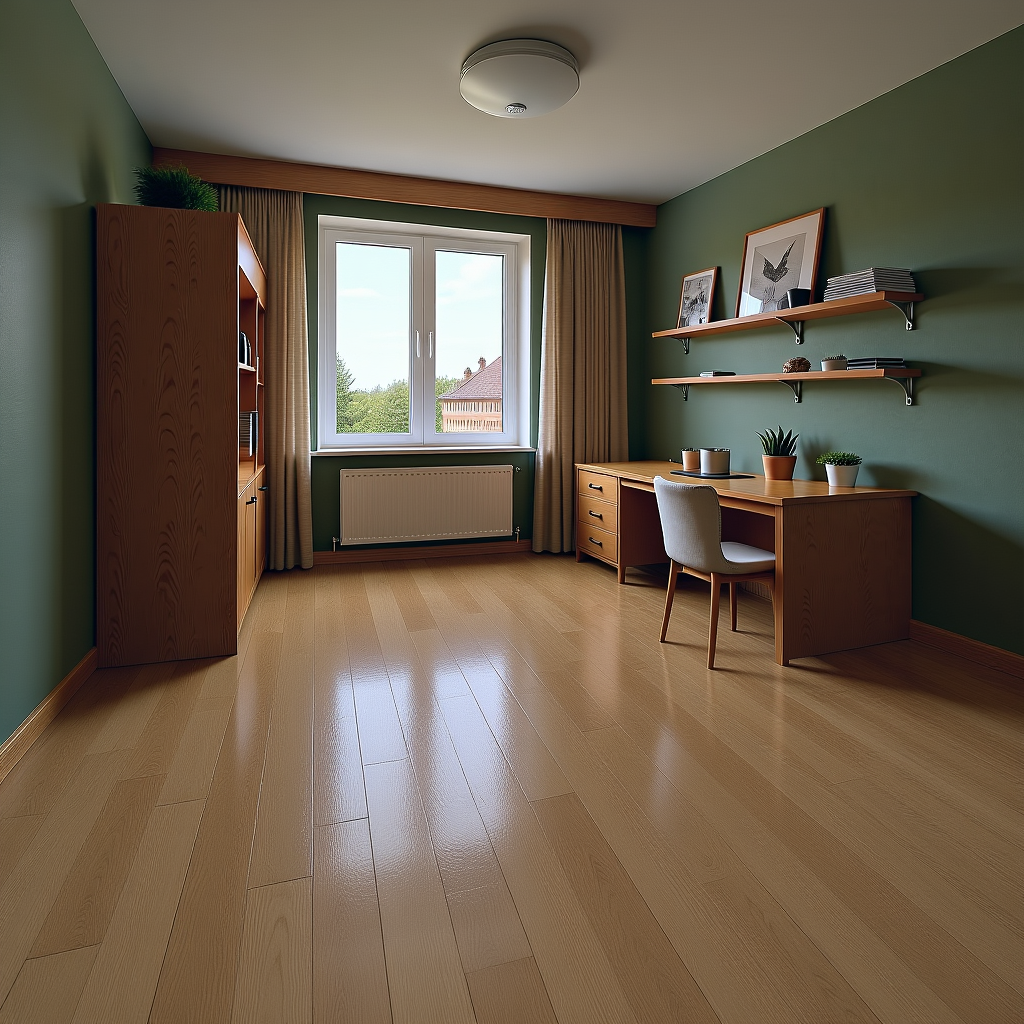

In [63]:
from PIL import Image

img = Image.open("floor/3.jpg").convert("RGB")

prompt1 = "Make a mock-up of a russian design room with interior items, carpet, and window, and where floor is total black with no shadows and reflections."
prompt2 = "Add lights and shadows without changing the floor"


image = pipe(
    image=img,
    prompt=prompt2,
    guidance_scale=5
).images[0]
image

In [64]:
image.save("floor/4.jpg")

In [49]:
ls

dog/         kontext-opaque/   test_lora.ipynb
floor/       kontext-sheer/    train_dreambooth_flux.py
image_1.png  opaque/           train_dreambooth_lora_flux_kontext.py
image_2.png  sheer/            trained-flux/
image_3.png  system_usage.log  train.ipynb
image_4.jpg  test_flux.ipynb   train.sh
image_5.jpg  test.ipynb        usage.sh


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [59]:
from PIL import Image

img = Image.open(f"floor/test/result_47.png").convert("RGB")
prompt1 = "Add a small rectangular carpet"
image = pipe(image=img,prompt=prompt1,guidance_scale=4).images[0]
image.save(f"floor/test_carpet/result_47.png")

# for i in range(60):
#     img = Image.open(f"floor/test/result_{i}.png").convert("RGB")
#     image = pipe(image=img,prompt=prompt1,guidance_scale=4).images[0]
#     image.save(f"floor/test_carpet/result_{i}.png")
    

100%|██████████| 28/28 [00:28<00:00,  1.02s/it]


In [47]:
from PIL import Image
import random

img = Image.open("floor/13.png").convert("RGB")



Temp = f"Make a realistic mock-up of a russian design room in minimalism style with interior items and where floor is total black with no shadows and reflections."

for i in range(15):
    image = pipe(image=img,prompt=Temp,guidance_scale=4.5).images[0]
    image.save(f"floor/test/result_{i}.png")

100%|██████████| 28/28 [00:28<00:00,  1.02s/it]


In [45]:
from PIL import Image
import random

img = Image.open("floor/13.png").convert("RGB")

bg = "big"
md = "medium"
sm = "small"

size = [bg,md,sm]


rad = "radiator"
car = "carpet"
tab = "table"
pic = "picture"
win = "window"
cur = "curtain"
dr = "door"
sf = "sofa"
tv = "tv"
cr = "chandelier"

furniture = [rad,car,tab,pic,win,cur,dr,sf,tv,cr]


rs = "russian"
sc = "scandinavian"
md = "modern"

tp = [rs,sc]


# prompt1 = "Make a realistic mock-up of a russian design room with interior items, furniture, carpet, and window, door and where floor is total black with no shadows and reflections."

for i in range(0,30):
    number = random.randint(5, 10)
    samp = random.sample(furniture, number) 
    
    Temp = f"Make a realistic mock-up of a {random.choice(size)} {random.choice(tp)} room with interior items,"
    for j in samp:
        Temp += j
        Temp += ", "
    Temp += "and where floor is total black with no shadows and reflections."
    print(Temp)
    image = pipe(image=img,prompt=Temp,guidance_scale=4.5).images[0]
    image.save(f"floor/test/result_{i}.png")

Make a realistic mock-up of a small scandinavian room with interior items,radiator, picture, table, window, curtain, and where floor is total black with no shadows and reflections.


100%|██████████| 28/28 [00:28<00:00,  1.02s/it]


Make a realistic mock-up of a big scandinavian room with interior items,window, door, carpet, chandelier, curtain, radiator, table, picture, and where floor is total black with no shadows and reflections.


100%|██████████| 28/28 [00:28<00:00,  1.02s/it]


Make a realistic mock-up of a small scandinavian room with interior items,door, carpet, table, picture, sofa, curtain, window, and where floor is total black with no shadows and reflections.


100%|██████████| 28/28 [00:28<00:00,  1.02s/it]


Make a realistic mock-up of a small scandinavian room with interior items,tv, chandelier, picture, radiator, carpet, table, and where floor is total black with no shadows and reflections.


100%|██████████| 28/28 [00:28<00:00,  1.02s/it]


Make a realistic mock-up of a small russian room with interior items,window, chandelier, door, sofa, picture, curtain, and where floor is total black with no shadows and reflections.


100%|██████████| 28/28 [00:28<00:00,  1.02s/it]


Make a realistic mock-up of a medium russian room with interior items,table, door, chandelier, radiator, window, picture, and where floor is total black with no shadows and reflections.


100%|██████████| 28/28 [00:28<00:00,  1.02s/it]


Make a realistic mock-up of a small russian room with interior items,table, sofa, chandelier, picture, curtain, radiator, carpet, and where floor is total black with no shadows and reflections.


100%|██████████| 28/28 [00:28<00:00,  1.02s/it]


Make a realistic mock-up of a big scandinavian room with interior items,door, sofa, radiator, curtain, table, chandelier, carpet, tv, picture, window, and where floor is total black with no shadows and reflections.


100%|██████████| 28/28 [00:28<00:00,  1.02s/it]


Make a realistic mock-up of a big scandinavian room with interior items,picture, door, carpet, tv, table, sofa, chandelier, window, curtain, and where floor is total black with no shadows and reflections.


100%|██████████| 28/28 [00:28<00:00,  1.02s/it]


Make a realistic mock-up of a medium scandinavian room with interior items,door, window, curtain, radiator, sofa, picture, tv, table, carpet, chandelier, and where floor is total black with no shadows and reflections.


100%|██████████| 28/28 [00:28<00:00,  1.02s/it]


Make a realistic mock-up of a big russian room with interior items,carpet, window, curtain, sofa, radiator, table, door, and where floor is total black with no shadows and reflections.


100%|██████████| 28/28 [00:28<00:00,  1.02s/it]


Make a realistic mock-up of a big scandinavian room with interior items,picture, carpet, table, sofa, tv, window, chandelier, door, and where floor is total black with no shadows and reflections.


100%|██████████| 28/28 [00:28<00:00,  1.02s/it]


Make a realistic mock-up of a big russian room with interior items,door, curtain, table, carpet, window, tv, sofa, and where floor is total black with no shadows and reflections.


100%|██████████| 28/28 [00:28<00:00,  1.02s/it]


Make a realistic mock-up of a small russian room with interior items,tv, radiator, table, window, chandelier, curtain, sofa, carpet, and where floor is total black with no shadows and reflections.


100%|██████████| 28/28 [00:28<00:00,  1.02s/it]


Make a realistic mock-up of a medium russian room with interior items,picture, chandelier, tv, door, window, radiator, sofa, and where floor is total black with no shadows and reflections.


100%|██████████| 28/28 [00:28<00:00,  1.03s/it]


Make a realistic mock-up of a medium scandinavian room with interior items,table, radiator, tv, picture, door, curtain, chandelier, and where floor is total black with no shadows and reflections.


100%|██████████| 28/28 [00:28<00:00,  1.02s/it]


Make a realistic mock-up of a big russian room with interior items,picture, window, sofa, radiator, door, tv, table, curtain, carpet, and where floor is total black with no shadows and reflections.


100%|██████████| 28/28 [00:28<00:00,  1.02s/it]


Make a realistic mock-up of a medium russian room with interior items,chandelier, window, table, tv, curtain, radiator, carpet, picture, and where floor is total black with no shadows and reflections.


100%|██████████| 28/28 [00:28<00:00,  1.02s/it]


Make a realistic mock-up of a small russian room with interior items,tv, sofa, carpet, table, window, chandelier, and where floor is total black with no shadows and reflections.


100%|██████████| 28/28 [00:28<00:00,  1.02s/it]


Make a realistic mock-up of a small scandinavian room with interior items,sofa, picture, chandelier, tv, door, table, window, and where floor is total black with no shadows and reflections.


100%|██████████| 28/28 [00:28<00:00,  1.02s/it]


Make a realistic mock-up of a big russian room with interior items,tv, chandelier, sofa, window, picture, curtain, table, door, carpet, radiator, and where floor is total black with no shadows and reflections.


100%|██████████| 28/28 [00:28<00:00,  1.02s/it]


Make a realistic mock-up of a medium russian room with interior items,curtain, radiator, tv, door, table, picture, chandelier, window, and where floor is total black with no shadows and reflections.


100%|██████████| 28/28 [00:28<00:00,  1.02s/it]


Make a realistic mock-up of a small scandinavian room with interior items,door, sofa, chandelier, tv, carpet, table, radiator, curtain, and where floor is total black with no shadows and reflections.


100%|██████████| 28/28 [00:28<00:00,  1.02s/it]


Make a realistic mock-up of a big russian room with interior items,curtain, tv, chandelier, picture, radiator, table, door, carpet, window, and where floor is total black with no shadows and reflections.


100%|██████████| 28/28 [00:28<00:00,  1.02s/it]


Make a realistic mock-up of a small russian room with interior items,carpet, chandelier, tv, curtain, window, picture, sofa, and where floor is total black with no shadows and reflections.


100%|██████████| 28/28 [00:28<00:00,  1.02s/it]


Make a realistic mock-up of a medium russian room with interior items,radiator, table, picture, curtain, chandelier, tv, carpet, window, and where floor is total black with no shadows and reflections.


100%|██████████| 28/28 [00:28<00:00,  1.02s/it]


Make a realistic mock-up of a small russian room with interior items,sofa, carpet, tv, door, picture, table, window, and where floor is total black with no shadows and reflections.


100%|██████████| 28/28 [00:28<00:00,  1.02s/it]


Make a realistic mock-up of a big russian room with interior items,picture, chandelier, carpet, curtain, door, tv, and where floor is total black with no shadows and reflections.


100%|██████████| 28/28 [00:28<00:00,  1.02s/it]


Make a realistic mock-up of a big russian room with interior items,window, sofa, door, radiator, chandelier, tv, table, and where floor is total black with no shadows and reflections.


100%|██████████| 28/28 [00:28<00:00,  1.02s/it]


Make a realistic mock-up of a small scandinavian room with interior items,window, door, table, chandelier, picture, curtain, carpet, radiator, and where floor is total black with no shadows and reflections.


100%|██████████| 28/28 [00:28<00:00,  1.03s/it]


In [83]:
from PIL import Image


for i in range(20):
    img = Image.open(f"floor/test/result_{i}.png").convert("RGB")
    prompt = "Add a small rectangular carpet"
    image = pipe(image=img,prompt=prompt,guidance_scale=4).images[0]
    image.save(f"floor/test_carpet/result_{i}.png")
    


100%|██████████| 28/28 [00:28<00:00,  1.03s/it]


100%|██████████| 28/28 [00:28<00:00,  1.01s/it]


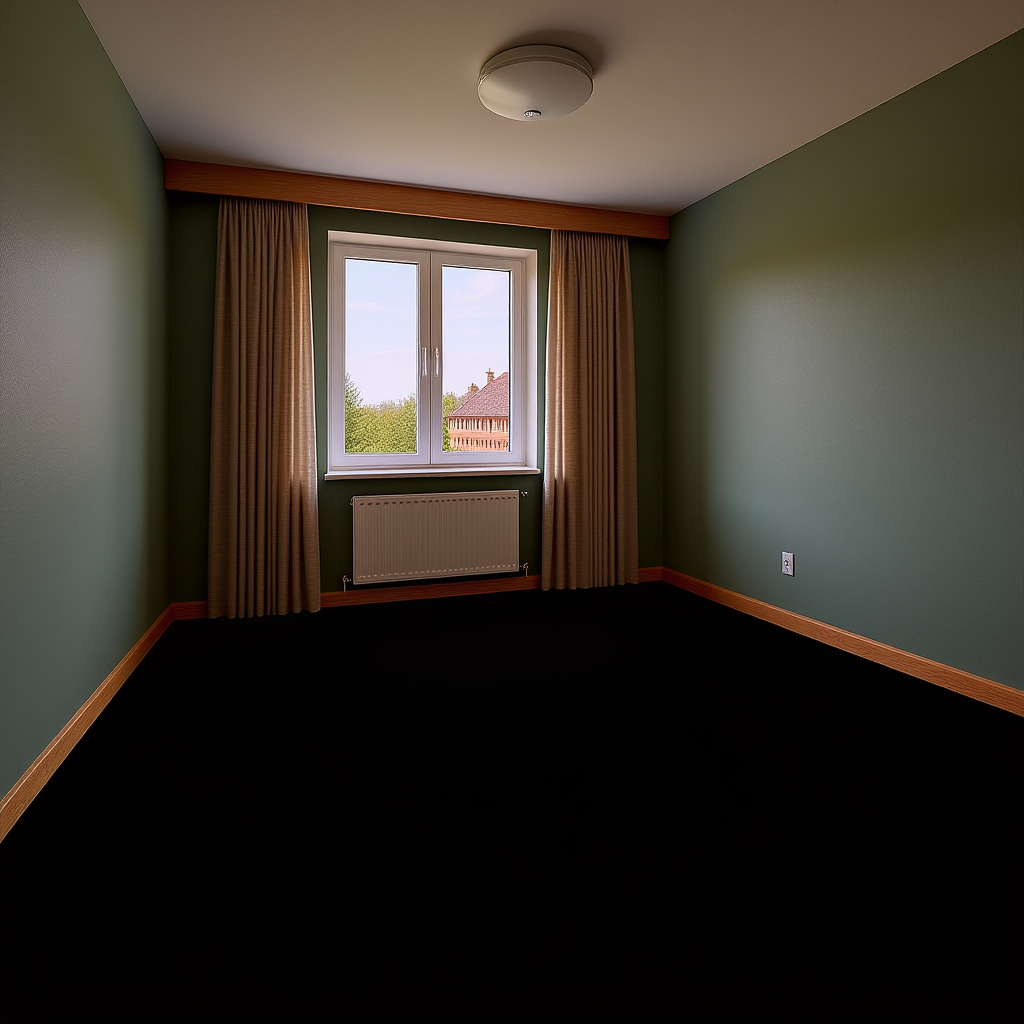

In [84]:
img = Image.open("floor/test/result_0.png").convert("RGB")
prompt = "Remove furniture, leave only walls and ceil"
image = pipe(image=img,prompt=prompt,guidance_scale=4).images[0]
image